In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

# Часть 1. Посмотрим на данные

In [9]:
pd.options.display.max_columns = 500

In [10]:
train = pd.read_csv('../data/raw/train.csv')

In [11]:
test  = pd.read_csv('../data/raw/test.csv')

In [12]:
train.head()

,id,timestamp,full_sq,life_sq,floor,max_floor,material,build_year,num_room,kitch_sq,state,product_type,sub_area,area_m,raion_popul,green_zone_part,indust_part,children_preschool,preschool_quota,preschool_education_centers_raion,children_school,school_quota,school_education_centers_raion,school_education_centers_top_20_raion,hospital_beds_raion,healthcare_centers_raion,university_top_20_raion,sport_objects_raion,additional_education_raion,culture_objects_top_25,culture_objects_top_25_raion,shopping_centers_raion,office_raion,thermal_power_plant_raion,incineration_raion,oil_chemistry_raion,radiation_raion,railroad_terminal_raion,big_market_raion,nuclear_reactor_raion,detention_facility_raion,full_all,male_f,female_f,young_all,young_male,young_female,work_all,work_male,work_female,ekder_all,ekder_male,ekder_female,0_6_all,0_6_male,0_6_female,7_14_all,7_14_male,7_14_female,0_17_all,0_17_male,0_17_female,16_29_all,16_29_male,16_29_female,0_13_all,0_13_male,0_13_female,raion_build_count_with_material_info,build_count_block,build_count_wood,build_count_frame,build_count_brick,build_count_monolith,build_count_panel,build_count_foam,build_count_slag,build_count_mix,raion_build_count_with_builddate_info,build_count_before_1920,build_count_1921-1945,build_count_1946-1970,build_count_1971-1995,build_count_after_1995,ID_metro,metro_min_avto,metro_km_avto,metro_min_walk,metro_km_walk,kindergarten_km,school_km,park_km,green_zone_km,industrial_km,water_treatment_km,cemetery_km,incineration_km,railroad_station_walk_km,railroad_station_walk_min,ID_railroad_station_walk,railroad_station_avto_km,railroad_station_avto_min,ID_railroad_station_avto,public_transport_station_km,public_transport_station_min_walk,water_km,water_1line,mkad_km,ttk_km,sadovoe_km,bulvar_ring_km,kremlin_km,big_road1_km,ID_big_road1,big_road1_1line,big_road2_km,ID_big_road2,railroad_km,railroad_1line,zd_vokzaly_avto_km,ID_railroad_terminal,bus_terminal_avto_km,ID_bus_terminal,oil_chemistry_km,nuclear_reactor_km,radiation_km,power_transmission_line_km,thermal_power_plant_km,ts_km,big_market_km,market_shop_km,fitness_km,swim_pool_km,ice_rink_km,stadium_km,basketball_km,hospice_morgue_km,detention_facility_km,public_healthcare_km,university_km,workplaces_km,shopping_centers_km,office_km,additional_education_km,preschool_km,big_church_km,church_synagogue_km,mosque_km,theater_km,museum_km,exhibition_km,catering_km,ecology,green_part_500,prom_part_500,office_count_500,office_sqm_500,trc_count_500,trc_sqm_500,cafe_count_500,cafe_sum_500_min_price_avg,cafe_sum_500_max_price_avg,cafe_avg_price_500,cafe_count_500_na_price,cafe_count_500_price_500,cafe_count_500_price_1000,cafe_count_500_price_1500,cafe_count_500_price_2500,cafe_count_500_price_4000,cafe_count_500_price_high,big_church_count_500,church_count_500,mosque_count_500,leisure_count_500,sport_count_500,market_count_500,green_part_1000,prom_part_1000,office_count_1000,office_sqm_1000,trc_count_1000,trc_sqm_1000,cafe_count_1000,cafe_sum_1000_min_price_avg,cafe_sum_1000_max_price_avg,cafe_avg_price_1000,cafe_count_1000_na_price,cafe_count_1000_price_500,cafe_count_1000_price_1000,cafe_count_1000_price_1500,cafe_count_1000_price_2500,cafe_count_1000_price_4000,cafe_count_1000_price_high,big_church_count_1000,church_count_1000,mosque_count_1000,leisure_count_1000,sport_count_1000,market_count_1000,green_part_1500,prom_part_1500,office_count_1500,office_sqm_1500,trc_count_1500,trc_sqm_1500,cafe_count_1500,cafe_sum_1500_min_price_avg,cafe_sum_1500_max_price_avg,cafe_avg_price_1500,cafe_count_1500_na_price,cafe_count_1500_price_500,cafe_count_1500_price_1000,cafe_count_1500_price_1500,cafe_count_1500_price_2500,cafe_count_1500_price_4000,cafe_count_1500_price_high,big_church_count_1500,church_count_1500,mosque_count_1500,leisure_count_1500,sport_count_1500,market_count_1500,green_part_2000,prom_part_2000,office_count_2000,office_sqm_2000,trc_count_2000,trc_sqm_2000,cafe_count_2000,cafe_sum_2000_min_price_avg,cafe_sum_2000_max_price_av

In [13]:
train.shape

(30471, 292)

In [16]:
test.head()

,id,timestamp,full_sq,life_sq,floor,max_floor,material,build_year,num_room,kitch_sq,state,product_type,sub_area,area_m,raion_popul,green_zone_part,indust_part,children_preschool,preschool_quota,preschool_education_centers_raion,children_school,school_quota,school_education_centers_raion,school_education_centers_top_20_raion,hospital_beds_raion,healthcare_centers_raion,university_top_20_raion,sport_objects_raion,additional_education_raion,culture_objects_top_25,culture_objects_top_25_raion,shopping_centers_raion,office_raion,thermal_power_plant_raion,incineration_raion,oil_chemistry_raion,radiation_raion,railroad_terminal_raion,big_market_raion,nuclear_reactor_raion,detention_facility_raion,full_all,male_f,female_f,young_all,young_male,young_female,work_all,work_male,work_female,ekder_all,ekder_male,ekder_female,0_6_all,0_6_male,0_6_female,7_14_all,7_14_male,7_14_female,0_17_all,0_17_male,0_17_female,16_29_all,16_29_male,16_29_female,0_13_all,0_13_male,0_13_female,raion_build_count_with_material_info,build_count_block,build_count_wood,build_count_frame,build_count_brick,build_count_monolith,build_count_panel,build_count_foam,build_count_slag,build_count_mix,raion_build_count_with_builddate_info,build_count_before_1920,build_count_1921-1945,build_count_1946-1970,build_count_1971-1995,build_count_after_1995,ID_metro,metro_min_avto,metro_km_avto,metro_min_walk,metro_km_walk,kindergarten_km,school_km,park_km,green_zone_km,industrial_km,water_treatment_km,cemetery_km,incineration_km,railroad_station_walk_km,railroad_station_walk_min,ID_railroad_station_walk,railroad_station_avto_km,railroad_station_avto_min,ID_railroad_station_avto,public_transport_station_km,public_transport_station_min_walk,water_km,water_1line,mkad_km,ttk_km,sadovoe_km,bulvar_ring_km,kremlin_km,big_road1_km,ID_big_road1,big_road1_1line,big_road2_km,ID_big_road2,railroad_km,railroad_1line,zd_vokzaly_avto_km,ID_railroad_terminal,bus_terminal_avto_km,ID_bus_terminal,oil_chemistry_km,nuclear_reactor_km,radiation_km,power_transmission_line_km,thermal_power_plant_km,ts_km,big_market_km,market_shop_km,fitness_km,swim_pool_km,ice_rink_km,stadium_km,basketball_km,hospice_morgue_km,detention_facility_km,public_healthcare_km,university_km,workplaces_km,shopping_centers_km,office_km,additional_education_km,preschool_km,big_church_km,church_synagogue_km,mosque_km,theater_km,museum_km,exhibition_km,catering_km,ecology,green_part_500,prom_part_500,office_count_500,office_sqm_500,trc_count_500,trc_sqm_500,cafe_count_500,cafe_sum_500_min_price_avg,cafe_sum_500_max_price_avg,cafe_avg_price_500,cafe_count_500_na_price,cafe_count_500_price_500,cafe_count_500_price_1000,cafe_count_500_price_1500,cafe_count_500_price_2500,cafe_count_500_price_4000,cafe_count_500_price_high,big_church_count_500,church_count_500,mosque_count_500,leisure_count_500,sport_count_500,market_count_500,green_part_1000,prom_part_1000,office_count_1000,office_sqm_1000,trc_count_1000,trc_sqm_1000,cafe_count_1000,cafe_sum_1000_min_price_avg,cafe_sum_1000_max_price_avg,cafe_avg_price_1000,cafe_count_1000_na_price,cafe_count_1000_price_500,cafe_count_1000_price_1000,cafe_count_1000_price_1500,cafe_count_1000_price_2500,cafe_count_1000_price_4000,cafe_count_1000_price_high,big_church_count_1000,church_count_1000,mosque_count_1000,leisure_count_1000,sport_count_1000,market_count_1000,green_part_1500,prom_part_1500,office_count_1500,office_sqm_1500,trc_count_1500,trc_sqm_1500,cafe_count_1500,cafe_sum_1500_min_price_avg,cafe_sum_1500_max_price_avg,cafe_avg_price_1500,cafe_count_1500_na_price,cafe_count_1500_price_500,cafe_count_1500_price_1000,cafe_count_1500_price_1500,cafe_count_1500_price_2500,cafe_count_1500_price_4000,cafe_count_1500_price_high,big_church_count_1500,church_count_1500,mosque_count_1500,leisure_count_1500,sport_count_1500,market_count_1500,green_part_2000,prom_part_2000,office_count_2000,office_sqm_2000,trc_count_2000,trc_sqm_2000,cafe_count_2000,cafe_sum_2000_min_price_avg,cafe_sum_2000_max_price_av

### Иногда удобнее использовать другой таргет чем тот, который поставлен в задаче

In [19]:
train['price_per_m2'] = train['price_doc']/(train['full_sq']+1)

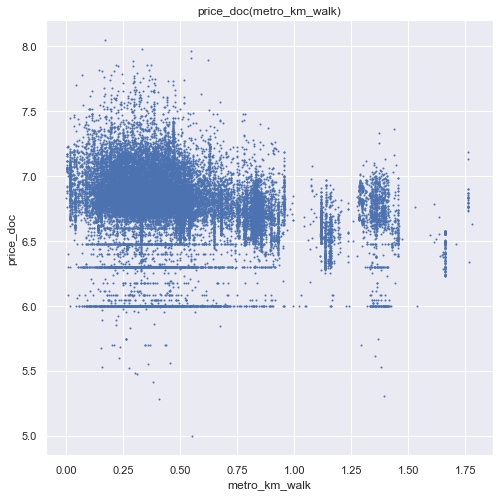

In [20]:
plt.figure(figsize=(8,8))
plt.scatter( np.log10(train['metro_km_walk']+1), np.log10(train['price_doc']) , s= 1)
plt.xlabel('metro_km_walk')
plt.ylabel('price_doc')
plt.title("price_doc(metro_km_walk)" )
plt.show()


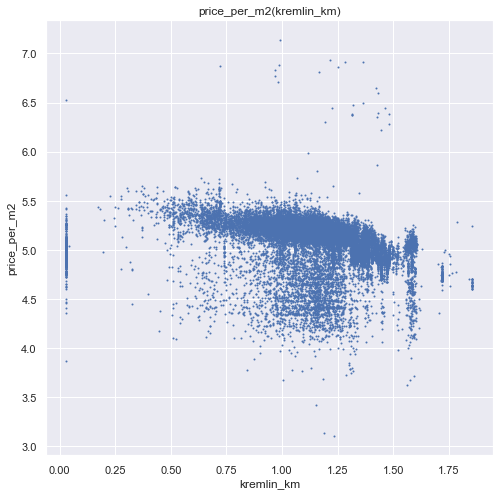

In [21]:
plt.figure(figsize=(8,8))
plt.scatter( np.log10(train['kremlin_km']+1), np.log10(train['price_per_m2']) , s= 1)
plt.xlabel('kremlin_km')
plt.ylabel('price_per_m2')
plt.title("price_per_m2(kremlin_km)" )
plt.show()


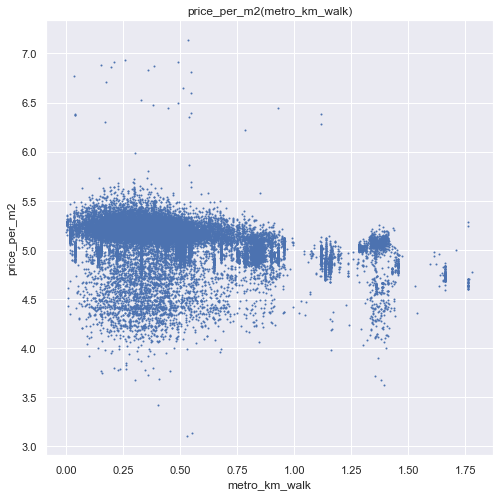

In [22]:
plt.figure(figsize=(8,8))
plt.scatter( np.log10(train['metro_km_walk']+1), np.log10(train['price_per_m2']) , s= 1)
plt.xlabel('metro_km_walk')
plt.ylabel('price_per_m2')
plt.title("price_per_m2(metro_km_walk)" )
plt.show()


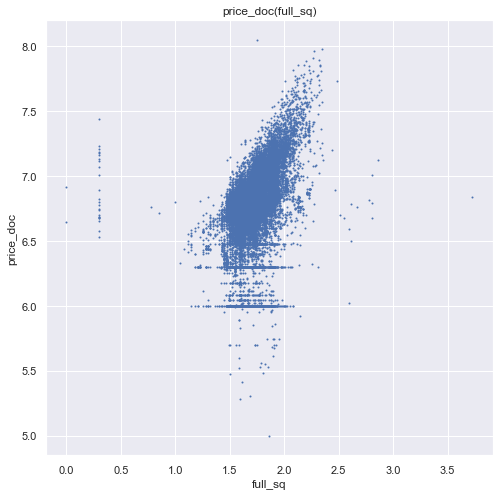

In [22]:
plt.figure(figsize=(8,8))
plt.scatter( np.log10(train['full_sq']+1), np.log10(train['price_doc']) , s= 1)
plt.xlabel('full_sq')
plt.ylabel('price_doc')
plt.title("price_doc(full_sq)" )
plt.show()


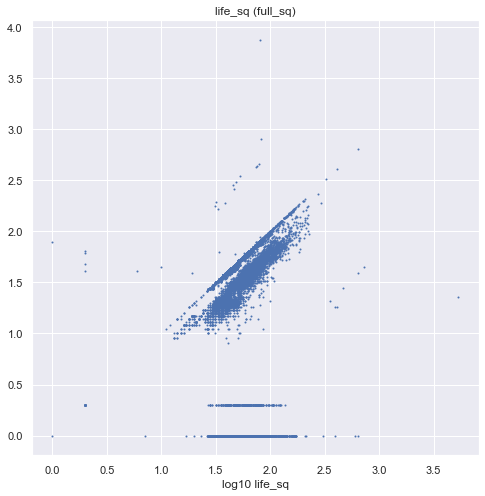

In [24]:
plt.figure(figsize=(8,8))
plt.scatter( np.log10( train['full_sq'].fillna(0)+1 ), np.log10(train['life_sq'].fillna(0)+1), s= 1)
plt.xlabel( 'log10 full_sq')
plt.xlabel( 'log10 life_sq')
plt.title('life_sq (full_sq)')
plt.show()

# данное наблюдение может помочь в построении модели для замены пропусков

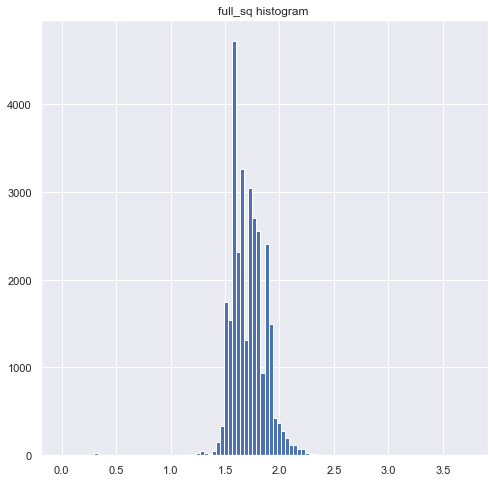

In [25]:
plt.figure(figsize=(8,8))
plt.hist( np.log10(train['full_sq']+1), bins = 100)
plt.title('full_sq histogram ' )
plt.show()

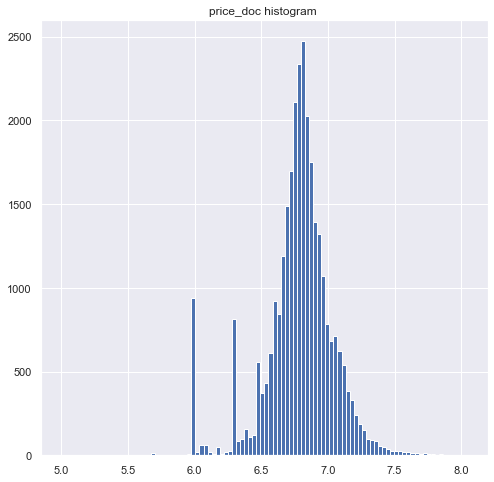

In [26]:
plt.figure(figsize=(8,8))
plt.hist( np.log10(train['price_doc']+1), bins = 100)
plt.title('price_doc histogram ' )
plt.show()

## Метрики

RMSLE метрика


$$\sqrt{ \sum_{i=1}^{N} ( \log{y_{true}} -\log{y_{pred}} )^2 }$$

## Простая модель

In [27]:
from sklearn.linear_model import SGDRegressor

In [28]:
model = SGDRegressor()

In [29]:
features = ['metro_km_walk', 'kremlin_km', 'full_sq']
target = 'price_doc'
model.fit( X=train[features].fillna(0), y = train[target] )

SGDRegressor()

In [30]:
test_prediction = model.predict( test[features].fillna(0) )

In [31]:
sample_submission = pd.read_csv('../data/raw/sample_submission.csv')

In [32]:
sample_submission['price_doc']= test_prediction

In [33]:
sample_submission['price_doc'] = sample_submission['price_doc'].clip( 1, 1000000000) 
# наши цены должны быть положительными

In [34]:
sample_submission.to_csv('predict1.csv', index = False)

### такая модель получила 0.8021 LB score

## Часть 2. Cross-validation

In [35]:
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error, mean_squared_log_error

In [36]:
features = ['metro_km_walk', 'kremlin_km', 'full_sq']
target = 'price_doc'

msle_list = []
mse_list = []

kf = KFold(n_splits=5, shuffle = True)
for i, (train_index, val_index) in enumerate(kf.split(train)):
    train_part = train.loc[train_index, : ]
    val_part = train.loc[val_index,:  ]

    model = SGDRegressor()
    model.fit( X=train_part[features].fillna(0), y = train_part[target] )
    val_prediction = model.predict( val_part[features].fillna(0) ).clip( 0, 1000000000)
    
    
    mse = mean_squared_error(val_prediction,  val_part[target]  )
    msle = mean_squared_log_error(val_prediction,  val_part[target]  )
    
    
    msle_list.append(msle)
    mse_list.append(mse)
    print( f'Fold {i}: msle {msle} , mse {mse}')
    

    
print( f'MSLE average = {np.mean(msle_list)} , std ={np.std(msle_list)}  '  )

Fold 0: msle 2.7458933221714137 , mse 283798850901866.44
Fold 1: msle 79.43752621967832 , mse 1443640087990543.0
Fold 2: msle 26.606017674598444 , mse 9.859634125427332e+17
Fold 3: msle 169.17004945768994 , mse 1.5375538144846064e+17
Fold 4: msle 73.64749037593502 , mse 92799064577283.19
MSLE average = 70.32139541001463 , std =57.17115686895349  


## Часть 3. feature preprocessing 

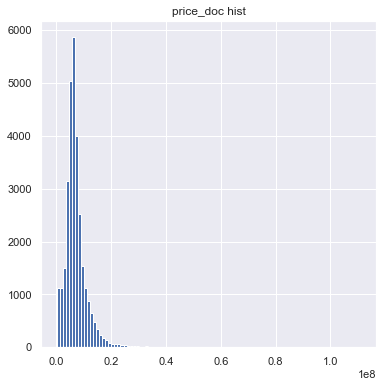

In [37]:
plt.figure(figsize=(6,6))
plt.hist(train['price_doc'], bins = 100)  # price_per_m2
plt.title('price_doc hist')
plt.show()

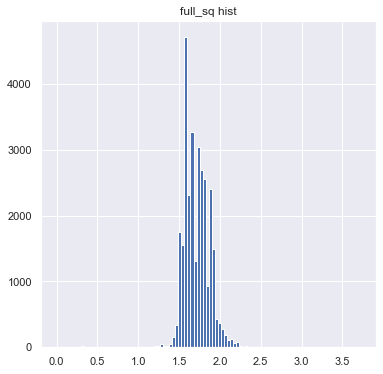

In [39]:
plt.figure(figsize=(6,6))
plt.hist( np.log10(train['full_sq']+1), bins = 100)  # price_per_m2
plt.title('full_sq hist')
plt.show()

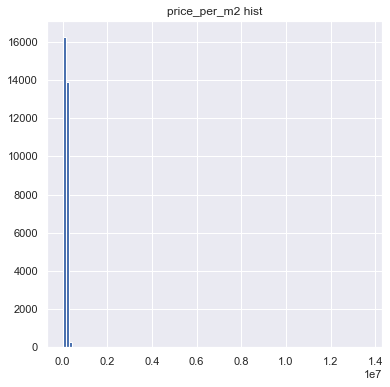

In [40]:
plt.figure(figsize=(6,6))
plt.hist(train['price_per_m2'], bins = 100)  # price_per_m2
plt.title('price_per_m2 hist')
plt.show()

### идеи для обработки целевой переменной 
1) выкинуть большие значения

2) заполнить большие значения некоторым числом (.clip() )

3) логарифмировать целевую переменную




In [42]:
features = ['metro_km_walk', 'kremlin_km', 'full_sq']

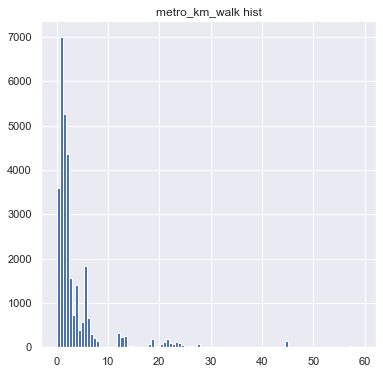

In [43]:
plt.figure(figsize=(6,6))
plt.hist(train['metro_km_walk'], bins = 100) 
plt.title('metro_km_walk hist')
plt.show()

In [44]:
train.loc[train['metro_km_walk'] ==0 ]

,id,timestamp,full_sq,life_sq,floor,max_floor,material,build_year,num_room,kitch_sq,state,product_type,sub_area,area_m,raion_popul,green_zone_part,indust_part,children_preschool,preschool_quota,preschool_education_centers_raion,children_school,school_quota,school_education_centers_raion,school_education_centers_top_20_raion,hospital_beds_raion,healthcare_centers_raion,university_top_20_raion,sport_objects_raion,additional_education_raion,culture_objects_top_25,culture_objects_top_25_raion,shopping_centers_raion,office_raion,thermal_power_plant_raion,incineration_raion,oil_chemistry_raion,radiation_raion,railroad_terminal_raion,big_market_raion,nuclear_reactor_raion,detention_facility_raion,full_all,male_f,female_f,young_all,young_male,young_female,work_all,work_male,work_female,ekder_all,ekder_male,ekder_female,0_6_all,0_6_male,0_6_female,7_14_all,7_14_male,7_14_female,0_17_all,0_17_male,0_17_female,16_29_all,16_29_male,16_29_female,0_13_all,0_13_male,0_13_female,raion_build_count_with_material_info,build_count_block,build_count_wood,build_count_frame,build_count_brick,build_count_monolith,build_count_panel,build_count_foam,build_count_slag,build_count_mix,raion_build_count_with_builddate_info,build_count_before_1920,build_count_1921-1945,build_count_1946-1970,build_count_1971-1995,build_count_after_1995,ID_metro,metro_min_avto,metro_km_avto,metro_min_walk,metro_km_walk,kindergarten_km,school_km,park_km,green_zone_km,industrial_km,water_treatment_km,cemetery_km,incineration_km,railroad_station_walk_km,railroad_station_walk_min,ID_railroad_station_walk,railroad_station_avto_km,railroad_station_avto_min,ID_railroad_station_avto,public_transport_station_km,public_transport_station_min_walk,water_km,water_1line,mkad_km,ttk_km,sadovoe_km,bulvar_ring_km,kremlin_km,big_road1_km,ID_big_road1,big_road1_1line,big_road2_km,ID_big_road2,railroad_km,railroad_1line,zd_vokzaly_avto_km,ID_railroad_terminal,bus_terminal_avto_km,ID_bus_terminal,oil_chemistry_km,nuclear_reactor_km,radiation_km,power_transmission_line_km,thermal_power_plant_km,ts_km,big_market_km,market_shop_km,fitness_km,swim_pool_km,ice_rink_km,stadium_km,basketball_km,hospice_morgue_km,detention_facility_km,public_healthcare_km,university_km,workplaces_km,shopping_centers_km,office_km,additional_education_km,preschool_km,big_church_km,church_synagogue_km,mosque_km,theater_km,museum_km,exhibition_km,catering_km,ecology,green_part_500,prom_part_500,office_count_500,office_sqm_500,trc_count_500,trc_sqm_500,cafe_count_500,cafe_sum_500_min_price_avg,cafe_sum_500_max_price_avg,cafe_avg_price_500,cafe_count_500_na_price,cafe_count_500_price_500,cafe_count_500_price_1000,cafe_count_500_price_1500,cafe_count_500_price_2500,cafe_count_500_price_4000,cafe_count_500_price_high,big_church_count_500,church_count_500,mosque_count_500,leisure_count_500,sport_count_500,market_count_500,green_part_1000,prom_part_1000,office_count_1000,office_sqm_1000,trc_count_1000,trc_sqm_1000,cafe_count_1000,cafe_sum_1000_min_price_avg,cafe_sum_1000_max_price_avg,cafe_avg_price_1000,cafe_count_1000_na_price,cafe_count_1000_price_500,cafe_count_1000_price_1000,cafe_count_1000_price_1500,cafe_count_1000_price_2500,cafe_count_1000_price_4000,cafe_count_1000_price_high,big_church_count_1000,church_count_1000,mosque_count_1000,leisure_count_1000,sport_count_1000,market_count_1000,green_part_1500,prom_part_1500,office_count_1500,office_sqm_1500,trc_count_1500,trc_sqm_1500,cafe_count_1500,cafe_sum_1500_min_price_avg,cafe_sum_1500_max_price_avg,cafe_avg_price_1500,cafe_count_1500_na_price,cafe_count_1500_price_500,cafe_count_1500_price_1000,cafe_count_1500_price_1500,cafe_count_1500_price_2500,cafe_count_1500_price_4000,cafe_count_1500_price_high,big_church_count_1500,church_count_1500,mosque_count_1500,leisure_count_1500,sport_count_1500,market_count_1500,green_part_2000,prom_part_2000,office_count_2000,office_sqm_2000,trc_count_2000,trc_sqm_2000,cafe_count_2000,cafe_sum_2000_min_price_avg,cafe_sum_2000_max_price_av

In [45]:
train.loc[train['metro_km_walk'] .isna() ].count()

id                    25
timestamp             25
full_sq               25
life_sq               21
floor                 25
                      ..
leisure_count_5000    25
sport_count_5000      25
market_count_5000     25
price_doc             25
price_per_m2          25
Length: 293, dtype: int64

### Идеи для заполнения пропусков  
 1) Заполнить 0, медианной, средним,

 2) Построить модель для заполнения пропусков
 
 3) удалить пропуски
 
 4) при заполнении пропусков добавить колонку с бинарым признкаом 0/1 тут был пропуск

### categorical variables

In [46]:
train['product_type'].value_counts()

Investment       19448
OwnerOccupier    11023
Name: product_type, dtype: int64

In [47]:
train['product_type'].replace( { 'Investment':1,'OwnerOccupier':0  })

0        1
1        1
2        1
3        1
4        1
        ..
30466    1
30467    1
30468    0
30469    1
30470    1
Name: product_type, Length: 30471, dtype: int64

In [48]:
# get_dummies
pd.get_dummies(train['school_education_centers_raion'])

,0,1,2,3,4,5,6,7,8,9,10,11,13,14
0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,1,0,0,0,0,0
2,0,0,0,0,0,0,0,1,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,1,0,0,0
4,0,0,0,0,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30466,0,0,0,0,1,0,0,0,0,0,0,0,0,0
30467,0,0,0,0,1,0,0,0,0,0,0,0,0,0
30468,1,0,0,0,0,0,0,0,0,0,0,0,0,0
30469,0,0,0,0,0,0,0,0,1,0,0,0,0,0


In [49]:
train['sub_area'].value_counts()

Poselenie Sosenskoe               1776
Nekrasovka                        1611
Poselenie Vnukovskoe              1372
Poselenie Moskovskij               925
Poselenie Voskresenskoe            713
                                  ... 
Molzhaninovskoe                      3
Poselenie Shhapovskoe                2
Poselenie Kievskij                   2
Poselenie Klenovskoe                 1
Poselenie Mihajlovo-Jarcevskoe       1
Name: sub_area, Length: 146, dtype: int64

In [50]:
# target encoding
train['sub_area'].replace( train.groupby(['sub_area'])[target].mean())

0        6.670177e+06
1        8.392539e+06
2        6.605066e+06
3        8.809623e+06
4        1.158772e+07
             ...     
30466    7.127992e+06
30467    7.109681e+06
30468    6.215746e+06
30469    1.385088e+07
30470    6.168624e+06
Name: sub_area, Length: 30471, dtype: float64

In [149]:
train['price_m2'] =   train['price_doc']/ (train['full_sq']+1)

In [163]:
train['price_m2'].clip(train['price_m2'].quantile(0.01), train['price_m2'].quantile(0.99),
                                            inplace=True)

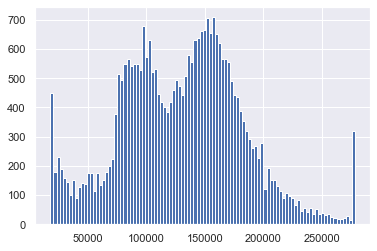

In [165]:
plt.hist(train['price_m2'] , bins =100  )
plt.show()

In [168]:
train['product_type'] = train['product_type'].replace( { 'Investment':1,'OwnerOccupier':0  })

In [170]:
test['product_type'] = test['product_type'].replace( { 'Investment':1,'OwnerOccupier':0  })

In [173]:
sub_area_target_encoding =  train.groupby(['sub_area'])['price_m2'].mean()

In [174]:
sub_area_target_encoding

sub_area
Ajeroport            172794.615268
Akademicheskoe       172200.809810
Alekseevskoe         171751.004057
Altuf'evskoe         119551.942143
Arbat                235404.490595
                         ...      
Vyhino-Zhulebino     130718.733708
Zamoskvorech'e       225312.769551
Zapadnoe Degunino     99672.943633
Zjablikovo           138139.955461
Zjuzino              153661.937460
Name: price_m2, Length: 146, dtype: float64

#### Идеи для преобразования категориальных признаков

1) Label Encoding  (не самая лучшая идея)

2) One-Hot Encoding (.get_dummies())

3) Target Encoding 

## datetime признаки

In [176]:
train['sub_area'] = train['sub_area'].replace( sub_area_target_encoding)
test['sub_area'] = test['sub_area'].replace( sub_area_target_encoding)

In [180]:
train['timestamp'] = pd.to_datetime(train['timestamp'])
test['timestamp'] = pd.to_datetime(test['timestamp'])

In [206]:
def get_date_time_features(timestamp_series: pd.Series) -> pd.DataFrame:
    
    output= pd.DataFrame()
    output['timestamp']= timestamp_series
    output['month'] = timestamp_series.dt.month.astype(np.int8)
#     output['hour_datetime'] = timestamp_series.dt.hour.astype(np.int8)  
    output['day_week'] = timestamp_series.dt.dayofweek.astype(np.int8)
    output['day_month_datetime'] =timestamp_series.dt.day.astype(np.int8)
    output['year'] = timestamp_series.dt.year.astype(np.int16)
#     _min = timestamp_series.iloc[0].astype(int)/1_000_000_000_000
    output['seconds'] = timestamp_series.astype(int)/1_000_000_000_000 
    return output

In [ ]:
# 	month	day_week	day_month_datetime	year	seconds

In [216]:
train = pd.concat( [train, get_date_time_features(train['timestamp'])] , axis=1 )

/Users/aleksandrzverkov/PycharmProjects/ml_2021/env/lib/python3.7/site-packages/ipykernel_launcher.py:11: FutureWarning: casting datetime64[ns] values to int64 with .astype(...) is deprecated and will raise in a future version. Use .view(...) instead.
  # This is added back by InteractiveShellApp.init_path()


In [217]:
test = pd.concat( [test, get_date_time_features(test['timestamp'])] , axis=1 )

/Users/aleksandrzverkov/PycharmProjects/ml_2021/env/lib/python3.7/site-packages/ipykernel_launcher.py:11: FutureWarning: casting datetime64[ns] values to int64 with .astype(...) is deprecated and will raise in a future version. Use .view(...) instead.
  # This is added back by InteractiveShellApp.init_path()


### Генерация новых признаков 

1) floor/ max_floor

2) kitch_sq/ full_sq

3) флаг последний этаж / первый этаж


# Домашнее задание

Ваша задача изучить как различные преобразования влияют на модель и итоговый результат. 

1) Для удобства написать функцию, которая реализовала бы кросс-валидацию. Данная функция принимает на вход данные и другие аргументы на выше усмотрение, на выходе скор на кроссвалидации и его стандартное отклонение.

2) Сделать несколько различных моделей с различными признаками и способами обработки признаков.

    1. Например в первой модели будут использованы  непрерывные признаки   ['metro_km_walk', 'kremlin_km', 'full_sq'] с заполненными пропусками
    
    2. Во второй модели нормируйте признаки из первой модели (std=1, mean = 0). Изменился ли результат? 
    
    3. Во второй модели добавлены преобразованные различным образом категориальне признаки ['product_type' , 'sub_area' ] и т.д.
    
    4. В третьей добавлены datetime признаки 
    
    5. И так далее. Попробуйте реализовать различные гипотезы

3) Для каждой модели нужно сделать кросс-валидацию и засабмитить предсказание на тестовой выборке на кагл


4) Построить график зависимости Leader board score от score на кросс-валидации для всех 5 моделей. 

5) Написать отчет с выводами. 



P.S. Не забудьте про то, что вы можете делать модель для предсказания price_m2, а итоговый результат подсчитывается по price_doc

P.P.S.  Все преобразования, которые вы делаете нужно проделывать и с тестовой выборкой!

P.P.P.S. Можно использовать готовые функции и преобразования из sklearn.